# **Background** 

Sebuah perusahaan retail shipping telah mengalami kebangkrutan dan anda sebagai data scientist telah ditunjuk untuk mengevaluasi feasibility perusahaan anda apakah layak dibeli oleh perusahaan yang anda bekerja, dan kalau tidak memberi penjelasan jelas mengapa.

# **Objective**

1. Tentukan performa dari perusahaan tersebut (entar sebut performa jelek kenapa dan diukur dari apa)
2. Tentukan efisiensi warehouse 
3. Apakah layak dibeli, dan room of improvement

# **Dataset**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("Online Retail Shipping.csv")
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].replace({0: 'Yes', 1: 'No'})
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,No
1,2,F,Flight,4,5,216,2,low,M,59,3088,No
2,3,A,Flight,2,2,183,4,low,M,48,3374,No
3,4,B,Flight,3,3,176,4,medium,M,10,1177,No
4,5,C,Flight,2,2,184,3,medium,F,46,2484,No
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,No
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,Yes
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,Yes
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,Yes


# **Data Cleaning**

In [4]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  object
dtypes: int64(7), object(5)
memory usage: 1.0+ MB


In [6]:
df[df.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


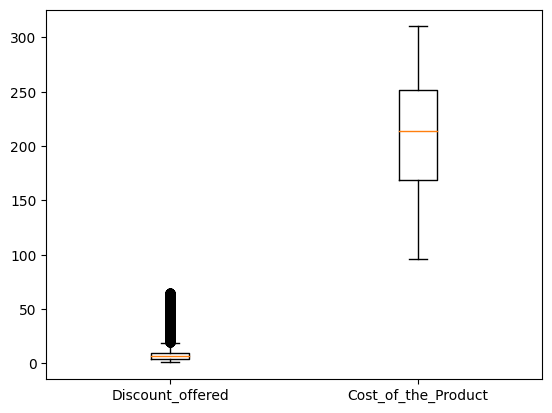

In [7]:
# , 'Weight_in_gms'
columns = ['Discount_offered', 'Cost_of_the_Product']
plt.boxplot(df[columns])
plt.xticks(range(1, len(columns) + 1), columns)
plt.show()


Bisa dilihat dari atas, kalau jumlah data yang null dan duplikat tidak ada, tipe data pada setiap tabel sudah benar, dan outlier didalam data masih dapat diterima (Masuk akal dalam skala statistik), maka kita akan terjun ke analisa

# **Analisa Secara Statistik**

Dibawah ini dapat dilihat kisaran nilai statistik pada dataset ini, yang paling penting adalah Customer rating dan Weight in grams yang akan menjadi patokan kinerja dari perusahaan ini.

untuk mempermudah analisa, Berat dan Cost of product akan dikelompokkan menjadi 3 kelompok (light, medium, heavy) & price range dengan jangka 100

dari tabel bawah dapat dilihat bahwa jumlah outlier anomali secara statistik bisa dikatakan tidak ada (perbedaan rata2 dan median yang kecil), dan dengan tabel statistik dibawah, kita dapat membuat grouping secara data dari Quartile atas dan bawah

In [8]:
exclude=df.drop('ID', axis=1)
exclude.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


# **Grouping** 

Sebelum menganalisa data, akan memudahkan kita untuk menampilkan hasil grafis jika kita dapat mengelompokkan setiap data berdasarkan data statistik diatas (min dan max) yang dimana kebetulan untuk disini semua dikelompokkan menjadi 3 kelompok.

tl;dr biar data rapih saat mempresentasikan grafik

In [9]:
def group(x):
    if x <= 2000:
        return 'Light'
    elif x<= 4000:
        return 'Medium'
    else:
        return 'Heavy'

def pricegroup(x):
    if x <= 100:
        return '$ 0-100 '
    if x <=200:
        return '$ 101-200'
    else:
        return '201+'

def discountgroup(x):
    if x <= 20:
        return '0-20%'
    if x <= 40:
        return '21-40%'
    else:
        return 'over 41%'


df['weight_group']= df['Weight_in_gms'].apply(group)
df['Price group']= df['Cost_of_the_Product'].apply(pricegroup)
df['Discount Group']= df['Discount_offered'].apply(discountgroup)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,weight_group,Price group,Discount Group
0,1,D,Flight,4,2,177,3,low,F,44,1233,No,Light,$ 101-200,over 41%
1,2,F,Flight,4,5,216,2,low,M,59,3088,No,Medium,201+,over 41%
2,3,A,Flight,2,2,183,4,low,M,48,3374,No,Medium,$ 101-200,over 41%
3,4,B,Flight,3,3,176,4,medium,M,10,1177,No,Light,$ 101-200,0-20%
4,5,C,Flight,2,2,184,3,medium,F,46,2484,No,Medium,$ 101-200,over 41%


# **Analysis**

# Performa perusahaan shipping: berdasarkan ketepatan waktu

Pertama-pertama kita akan coba untuk menganalisa berdasarkan berapa besarnya barang yang telat dan tidak telat, dan dapat dilihat yang telat itu sangat banyak dibandingkan yang tidak telat

secara logika jika barang datang dengan tepat waktu, maka rating pada yang tidak telat akan lebih besar dibandingkan dengan yang telat, namun dapat dilihat diatas bahwa jumlah rata2 rating sama. `Jika hanya berdasarkan grafik dibawah untuk menganalisa` dapat dikatakan ada kegejolakan dalam pelayanan servis (bisa saja yang telat datang, barang diantar secara pelan2 dan hati, dan sebaliknya)

Text(0.5, 1.0, 'Presentase Ketepatan Waktu')

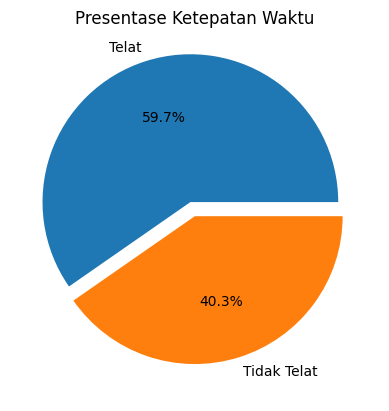

In [10]:
label=['Telat','Tidak Telat']

plt.pie(df['Reached.on.Time_Y.N'].value_counts(), labels=label, explode=(0.1,0), autopct='%1.1f%%')
plt.title('Presentase Ketepatan Waktu')

Text(0.5, 1.0, 'Perbandingan rating telat vs tidak telat')

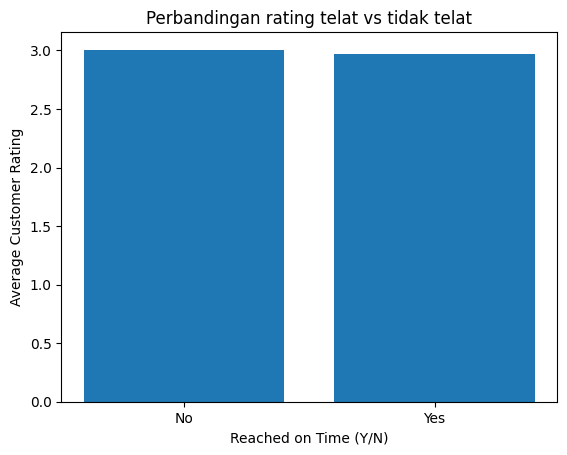

In [11]:
df['Reached.on.Time_Y.N'].value_counts()
df['Mode_of_Shipment'].value_counts()
# plt.scatter(df['Customer_care_calls'], df['Customer_rating'])
grouped_data = df.groupby('Reached.on.Time_Y.N')['Customer_rating'].mean()
plt.bar(grouped_data.index, grouped_data)
plt.xticks(range(len(grouped_data.index)), grouped_data.index)
plt.xlabel('Reached on Time (Y/N)')
plt.ylabel('Average Customer Rating')
plt.title('Perbandingan rating telat vs tidak telat')

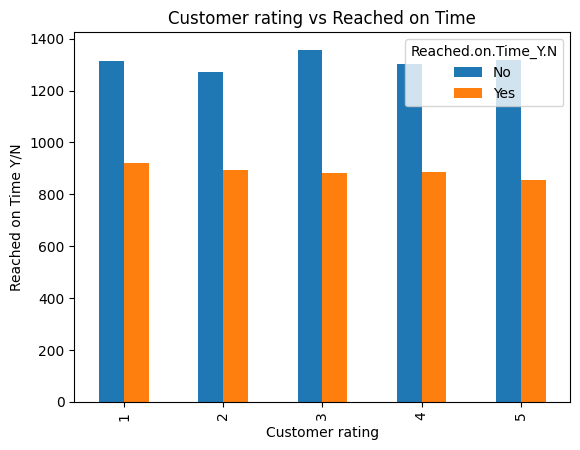

In [12]:
grouped_data = df.groupby(['Customer_rating','Reached.on.Time_Y.N']).size().unstack()
grouped_data.plot(kind='bar')
plt.xlabel('Customer rating')
plt.ylabel('Reached on Time Y/N')
plt.title('Customer rating vs Reached on Time')
plt.show()

--------------

Selanjutnya saya berpendapat bahwa, mungkin saja yang telat hanya ada di kapal (yang sering sekali ditahan di pelabuhan dan cuaca) maka selanjut nya kita akan menganalisa grafik berdasarkan transportasi nya, dan ternyata jumlah ketelatan pada tiap transportasi pun semuanya lebih besar yang lumayan besar, yang berarti dalam menilai performa perusahaan ini, management perusahaan ini sangatlah buruk dalam segi ketepatan waktu

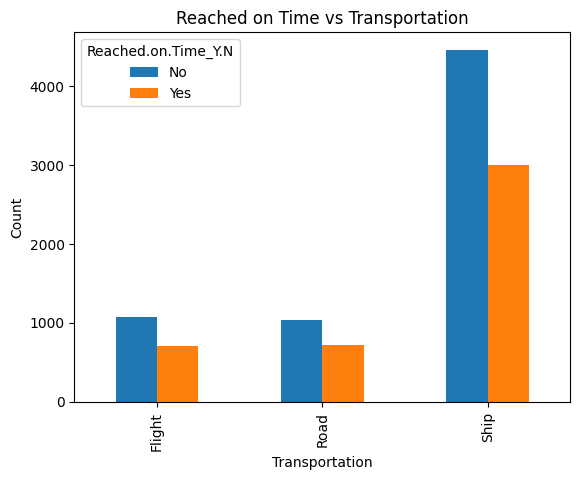

In [13]:
# Group by 'Transportation' and 'Reached.on.Time_Y.N' columns
grouped_data = df.groupby(['Mode_of_Shipment', 'Reached.on.Time_Y.N']).size().unstack()

# Plot grouped bar plot
grouped_bar = grouped_data.plot.bar()

# Set labels and title
grouped_bar.set_xlabel('Transportation')
grouped_bar.set_ylabel('Count')
grouped_bar.set_title('Reached on Time vs Transportation')

# Display the plot
plt.show()



**Kesimpulan: Management sangat buruk dalam ketapatan waktu**

Text(0.5, 1.0, 'Yang Telat vs transportasinya')

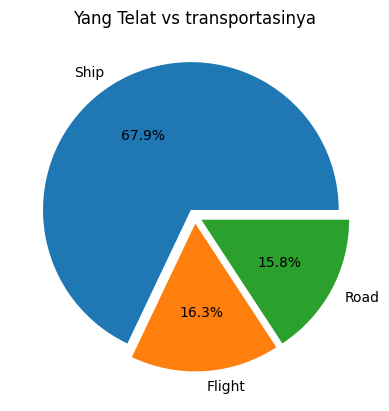

In [14]:
# (bikin pie chart tampilin proporsi ketelatan transportasi)

label=df[df['Reached.on.Time_Y.N']=='No']['Mode_of_Shipment'].value_counts()
plt.pie(label,labels=label.index,explode=(0.05,0.05,0.05),autopct='%1.1f%%')
plt.title('Yang Telat vs transportasinya')

--------------

# **Performance Perusahaan**

# Performa perusahaan shipping: berdasarkan Rating

Selanjutnya kita akan menganalisa transportasi dan rating nya, alasan dibelakang ini adalah bisa saja rating pada pesawat akan lebih baik ketimbang kapal karena pesawat akan lebih cepat dan aman pengirimannya, namun dapat dilihat dengan jelas, bukan begitu kasusnya untuk kali ini

Text(0.5, 1.0, 'Rata2 rating menurut transport')

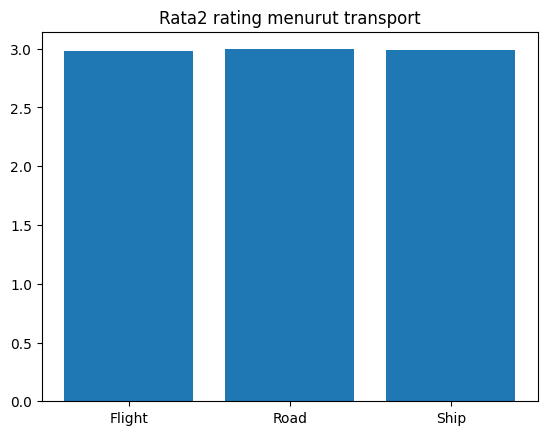

In [15]:
grouped_data = df.groupby('Mode_of_Shipment')['Customer_rating'].mean()
plt.bar(grouped_data.index, grouped_data)
plt.xticks(range(len(grouped_data.index)), grouped_data.index)
plt.title('Rata2 rating menurut transport')

----------------

maka dari itu, kita harus menelusuri lebih lanjut lagi persebaran data padad mode transportasi, mengapa rata2nya 3? apakah rating yang 5 dan 1, atau 4 dan 2 tinggi? 

namun dari grafik dibawah, persebaran pada setiap transportasi sama merata, yang kalau bisa disimpulkan berarti performa dari pengiriman bisa dikatakan jelek, karena kalau kita hanya mengambil rating diatas 3 sebagai "bagus" kita masih ada 40% rating yang jelek

C:\Users\Steven\AppData\Local\Temp\ipykernel_20328\4042122950.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)
C:\Users\Steven\AppData\Local\Temp\ipykernel_20328\4042122950.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


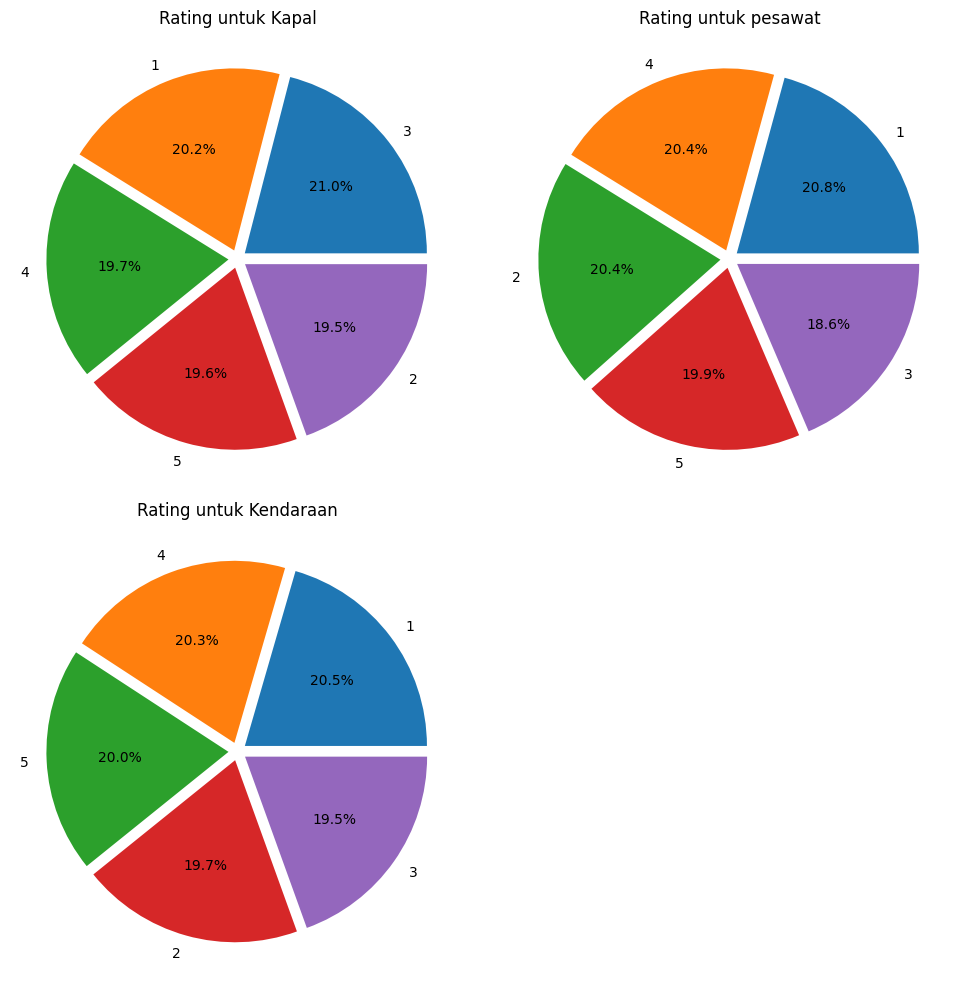

In [46]:
sizes1 = df[df['Mode_of_Shipment']=='Ship']['Customer_rating'].value_counts()
sizes2 = df[df['Mode_of_Shipment']=='Flight']['Customer_rating'].value_counts()
sizes3 = df[df['Mode_of_Shipment']=='Road']['Customer_rating'].value_counts()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.pie(sizes1,labels=sizes1.index,explode=(0.05,0.05,0.05,0.05,0.05),autopct='%1.1f%%')
plt.title('Rating untuk Kapal')

plt.subplot(2, 2, 2)
plt.pie(sizes2,labels=sizes2.index,explode=(0.05,0.05,0.05,0.05,0.05), autopct='%1.1f%%')
plt.title('Rating untuk pesawat')

plt.subplot(2, 2, 3)
plt.pie(sizes3,labels=sizes3.index,explode=(0.05,0.05,0.05,0.05,0.05), autopct='%1.1f%%')
plt.title('Rating untuk Kendaraan')

plt.tight_layout()
plt.show()

**Kesimpulan: performa jelek berdasarkan ketepatan waktu**

-----------

# Performa Analisis: Berdasarkan repetibilitas pelanggan

Selanjutnya kita akan menganalisa jumlah pelanggan yang menggunakan pelayanan perusahaan ini secara berkala, dari grafik dibawah dapat dilihat bahwa sebanyak-banyaknya pelanggan yang memakai pelayanan perusahaan ini, itu sebanyak 3 kali, setelah itu ada penurunan yang drastis. Ini menunjukkan bukti untuk performa perusahaan yang jelek, yang dimana orang hanya akan memakai pelayanan beberapa kali saja dan setalah itu memakai pelayanan perusahaan lainnya.

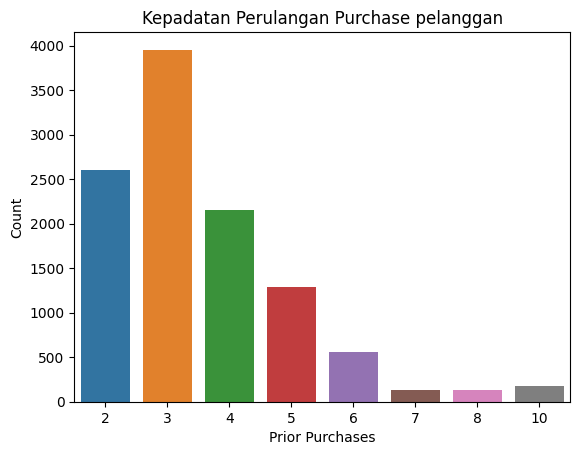

In [19]:
sea.countplot(data=df, x='Prior_purchases')
plt.xlabel('Prior Purchases')
plt.ylabel('Count')
plt.title('Kepadatan Perulangan Purchase pelanggan')
plt.show()

---

Selanjutnya kita dapat mengambil contoh pelanggan terloyal kita (10 Prior purchases), dan melihat alur rating dan presentase keterlambatannya seperti berikut

Text(0.5, 1.0, 'Persentase Rating vs Diskon untuk Pelanggan loyal')

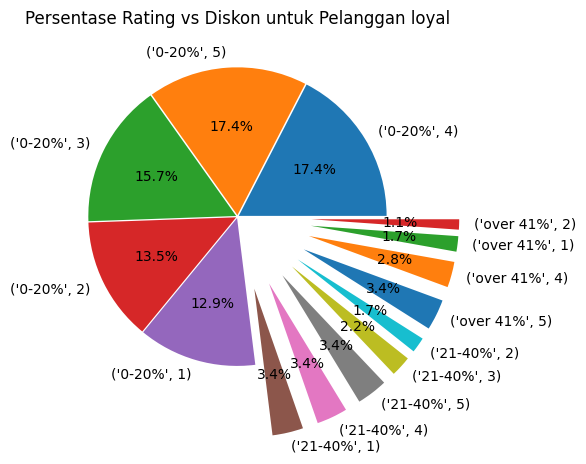

In [20]:
loyal=df[df['Prior_purchases']==10]
label= loyal.groupby('Discount Group')['Customer_rating'].value_counts()

plt.pie(label, labels=label.index, explode=(0.01, 0.01,0.01, 0.01, 0.01,0.5, 0.5,0.5, 0.5,0.5, 0.5, 0.5,0.5, 0.5),autopct='%1.1f%%')
plt.title('Persentase Rating vs Diskon untuk Pelanggan loyal')

Dapat dilihat dari atas bahwa pelanggan loyal kita pun secara garis besar, memberikan rating yang kurang lebih sama, dan presantase diskon tidak memengaruhi rating dari customer, dengan ini diskon apa yang paling optimal untuk menyenangkan pelanggan?

In [21]:
# df.groupby('Discount Group')[['Customer_rating']].value_counts()
print(df[df['Customer_rating'] == 4].groupby(['Discount Group', 'Customer_rating']).size().reset_index(name='count'))
print(df[df['Customer_rating'] == 1].groupby(['Discount Group', 'Customer_rating']).size().reset_index(name='count'))

  Discount Group  Customer_rating  count
0          0-20%                4   1780
1         21-40%                4    163
2       over 41%                4    246
  Discount Group  Customer_rating  count
0          0-20%                1   1789
1         21-40%                1    196
2       over 41%                1    250


Dikarenakan dilihat dari atas, diskon hampir tidak berpengaruh dengan rating customer, maka ada 2 pilihan: 1. hanya memberikan 0-20% diskon, atau adakan diskon besar-besaran yang menargetkan ketelatan barang. Jadi saat mengakusisi perusahaan ini, harus diperhatikan managementnya dibagian ini

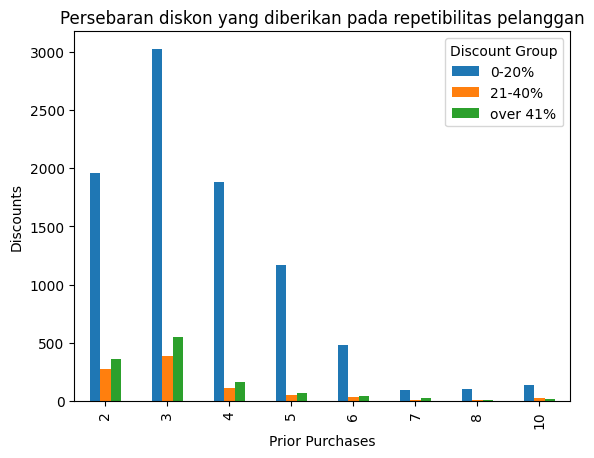

In [22]:
grouped_data = df.groupby(['Prior_purchases','Discount Group']).size().unstack()
grouped_data.plot(kind='bar')
plt.xlabel('Prior Purchases')
plt.ylabel('Discounts')
plt.title('Persebaran diskon yang diberikan pada repetibilitas pelanggan')
plt.show()


Mengapa pelanggan yang sudah sering memakai jasa pelayanan malah mendapatkan diskon yang sangat kecil dibandingkan dengan yang baru datang?

----

Selanjutnya kita akan membandingkan banyaknya pengulangan pelayanan dengan ketepatan waktu, karena bisa saja kepada pelanggan yang telah sering memakai pelayanan perusahaan ini akan lebih tepat waktu.

namun dapat dilihat bukan itu faktanya, kenyataannya yang telat masih lebih banyak sekali, terutama saat menangani pelanggan yang baru

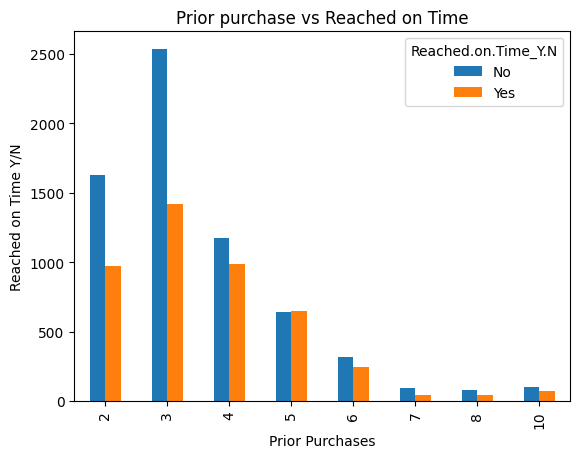

In [23]:
grouped_data = df.groupby(['Prior_purchases','Reached.on.Time_Y.N']).size().unstack()
grouped_data.plot(kind='bar')
plt.xlabel('Prior Purchases')
plt.ylabel('Reached on Time Y/N')
plt.title('Prior purchase vs Reached on Time')
plt.show()


**Kesimpulan: Berdasarkan repetibilitas pelanggan pun perusahaan ini gagal untuk mempertahankan pelanggan, dan target diskon yang dapat dikatakan salah sasaran**

---

# **Analisa: Efisiensi pengaturan gudang**

Selanjutnya kita akan meninjau efisiensi perusahaan ini dalam menjalani pengaturan gudang penyimpanan, ada beberapa faktor yang harus kita tinjau dari pengelompokan dahulu, pertama kita bisa mengelompokkan berdasarkan kepentingan produk, dan untuk itu lebih baik kita melampirkan total kepentingan produk dalam perusahaan ini dahulu

Text(0.5, 1.0, 'Persentase Kepentingan produk')

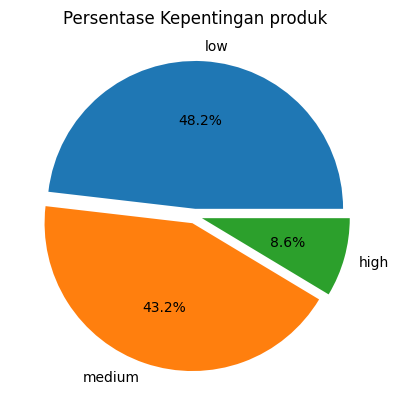

In [24]:
label=df['Product_importance'].value_counts()

plt.pie(df['Product_importance'].value_counts(),explode=(0.05, 0.05, 0.05), labels=label.index, autopct='%1.1f%%')
plt.title('Persentase Kepentingan produk')

Selanjutnya kita akan melihat kepadatan berat yang diatur/dikirim dalam perusahaan ini

Text(0.5, 1.0, 'kepadatan berat pengiriman')

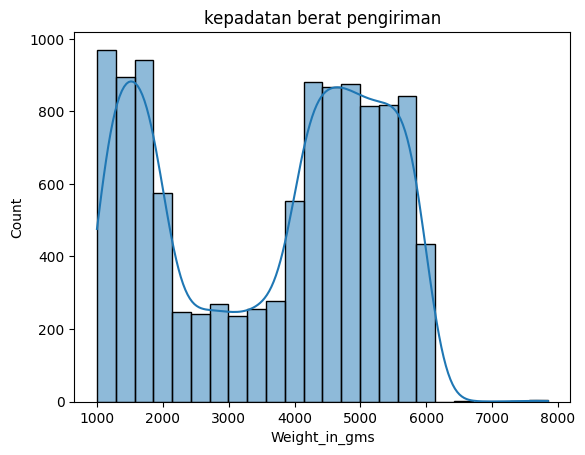

In [25]:
sea.histplot(df['Weight_in_gms'],kde=True)
plt.title('kepadatan berat pengiriman')

Dari grafik atas dapat kita simpulkan bahwa padatnya berat barang berada di kelas 'ringan' dan 'berat', dan kepentingan produk berada di tidak penting dan sedang

---

Selanjutnya kita akan meninjau persebaran barang pada setiap gudang, dari grafik dibawah dapat dilihat gudang f merupakan gudang yang dapat menampung 2x gudang lainnya, yang kemungkinan gudang f besarnya 2x gudang lainnya

Text(0.5, 1.0, 'Persentase Jumlah barang di tiap Warehouse')

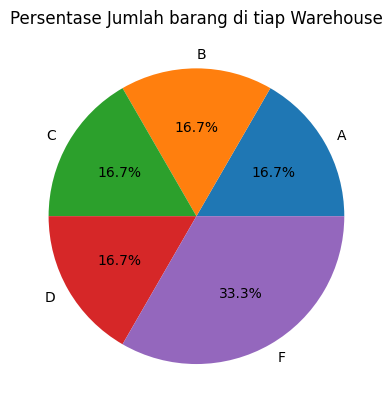

In [26]:
label=df.groupby('Warehouse_block')['Warehouse_block'].value_counts()
plt.pie(label, labels=label.index, autopct='%1.1f%%')
plt.title('Persentase Jumlah barang di tiap Warehouse')

---

Selanjutnya kita akan mengevaluasi apakah ada perbedaan warehouse yang lebih sering atau tidak, namun dalam grafik yang dibawah tidak menemukan bukti tersebut

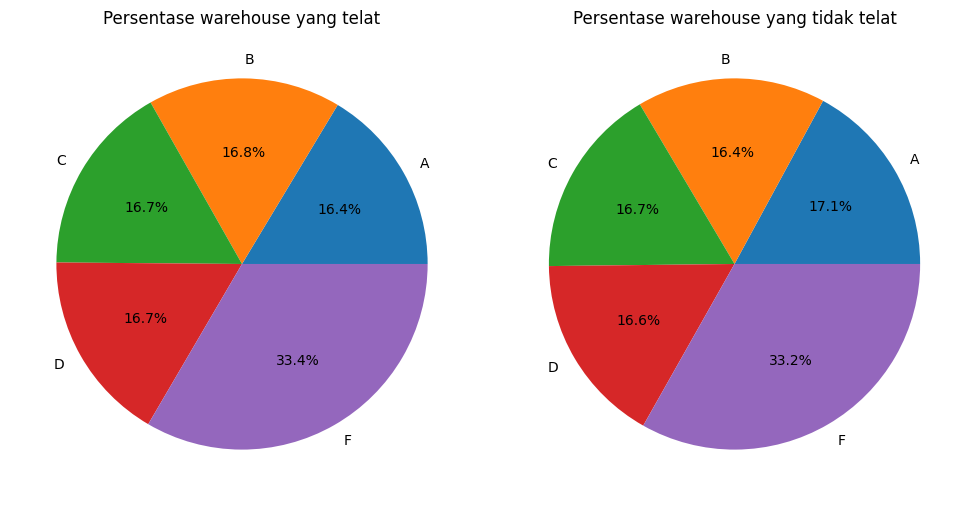

In [27]:
sizes1 = df.groupby('Warehouse_block')['Reached.on.Time_Y.N'].apply(lambda x: (x == 'No').sum())
sizes2 = df.groupby('Warehouse_block')['Reached.on.Time_Y.N'].apply(lambda x: (x == 'Yes').sum())

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].pie(sizes1, labels=sizes1.index, autopct='%1.1f%%')
axes[0].set_title('Persentase warehouse yang telat')

axes[1].pie(sizes2, labels=sizes2.index, autopct='%1.1f%%')
axes[1].set_title('Persentase warehouse yang tidak telat')

plt.tight_layout()
plt.show()


----

pada grafik dibawah, kita ingin melihat persebaran jenis berat pada setiap warehouse, dan dari grafik dibawah dapat disimpulkan bahwa persebaran di setiap warehouse sama rata, dan efisiensinya dapat dikatakan rapi dan efisien (karena tidak ada 1 kategori saja yang lebih besar dari yang lainnya dst)

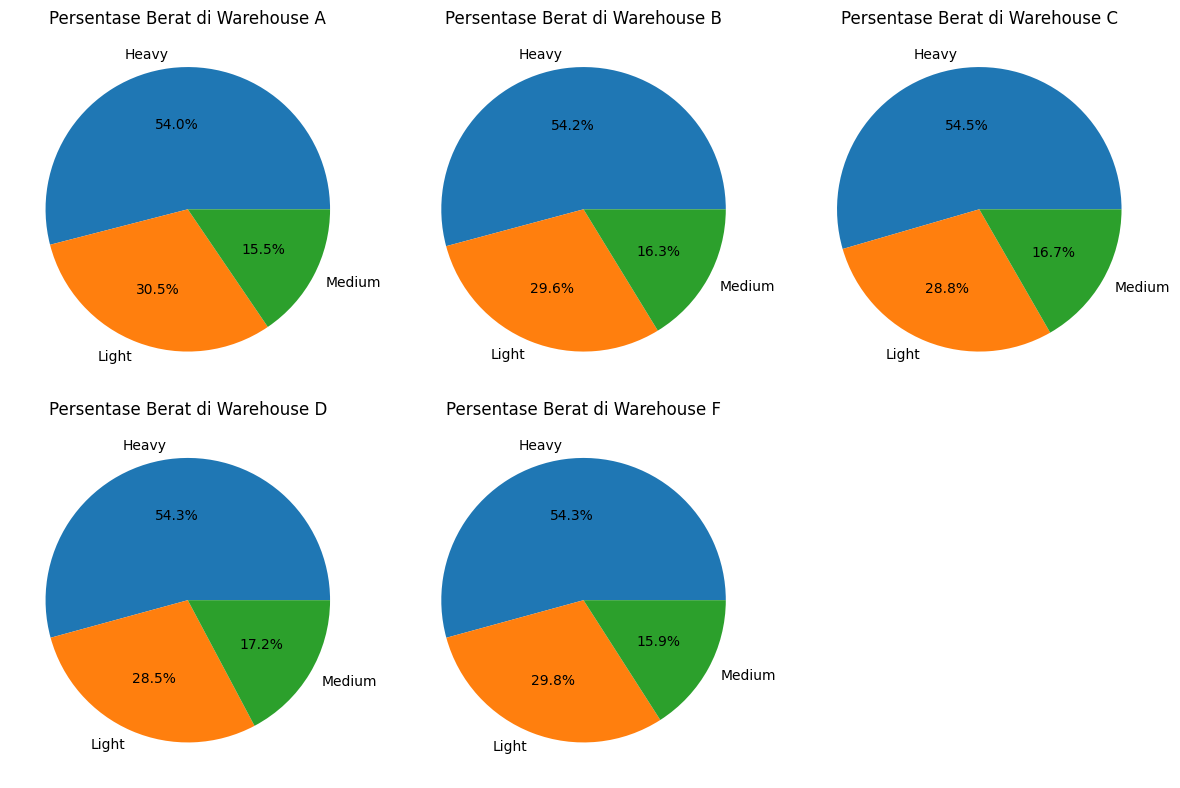

In [44]:
sizes1 = df[df['Warehouse_block'] == 'A']['weight_group'].value_counts()
sizes2 = df[df['Warehouse_block'] == 'B']['weight_group'].value_counts()
sizes3 = df[df['Warehouse_block'] == 'C']['weight_group'].value_counts()
sizes4 = df[df['Warehouse_block'] == 'D']['weight_group'].value_counts()
sizes5 = df[df['Warehouse_block'] == 'F']['weight_group'].value_counts()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharex=True, sharey=True)

axes[0, 0].pie(sizes1, labels=sizes1.index, autopct='%1.1f%%')
axes[0, 0].set_title('Persentase Berat di Warehouse A')

axes[0, 1].pie(sizes2, labels=sizes2.index, autopct='%1.1f%%')
axes[0, 1].set_title('Persentase Berat di Warehouse B')

axes[0, 2].pie(sizes3, labels=sizes3.index, autopct='%1.1f%%')
axes[0, 2].set_title('Persentase Berat di Warehouse C')

axes[1, 0].pie(sizes4, labels=sizes4.index, autopct='%1.1f%%')
axes[1, 0].set_title('Persentase Berat di Warehouse D')

axes[1, 1].pie(sizes5, labels=sizes5.index, autopct='%1.1f%%')
axes[1, 1].set_title('Persentase Berat di Warehouse F')

# Remove unused subplots
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()



**Kesimpulan: dari segi efisiensi warehouse, perusahaan ini menanganinya dengan cukup baik**

---

# **Kesimpulan**

Mengakosisi perusahaan ini ada tantangannya dan harus mengevaluasi beberapa faktor:
- Memperbaiki kinerja, menekan jumlah pengiriman yang telat, minimal harus sampai 30%
- Diskon bisa dikatakan terlalu berlebihan
- walaupun dirata-ratakan customer rating adalah 3, namun untuk menunjukkan kepuasan pelanggan, seharusnya rating 1 dan 2 harus rendah di setiap Prior purchases/loyalitas pelanggan (secara logika makin setia pelanggan, makin tinggi ratingnya terhadap kita)
- Jumlah repeatibility pelanggan sangat rendah
- Rating pelanggan harus ditingkatkan
- Rating berdasarkan transportasi sama (Seharusnya beda)

Jika kebutuhan yang diatas menurut Stakeholder tidak dapat dipenuhi maka saya **tidak menganjurkan** untuk mengakosisi perusahaan tersebut, kecuali stakeholder mengakosisi gudang perusahaan tersebut / ingin menggabungkan shipping company stakeholder, dengan catatan: Ganti Management

In [29]:
df.to_csv('Shipping Bersih.csv')